In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [36]:
with open('../../output/weights/p_date=2022-10-06-18_55_55/log.json', 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

41001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [37]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [38]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

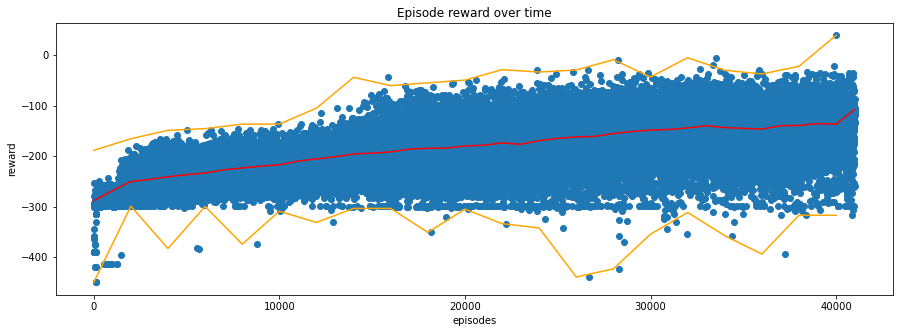

Maximum: 39.30000000000001
Average: -186.268808077853
Moving Average (simple): {0: -288.1, 1000: -268.4, 2000: -250.1, 3000: -246.1, 4000: -240.7, 5000: -236.6, 6000: -233.2, 7000: -227.1, 8000: -223.2, 9000: -219.7, 10000: -217.0, 11000: -209.7, 12000: -205.4, 13000: -201.1, 14000: -195.6, 15000: -193.9, 16000: -191.4, 17000: -186.0, 18000: -184.5, 19000: -183.9, 20000: -179.9, 21000: -178.2, 22000: -173.7, 23000: -176.4, 24000: -169.2, 25000: -164.7, 26000: -161.8, 27000: -160.7, 28000: -155.1, 29000: -151.1, 30000: -148.2, 31000: -147.1, 32000: -144.0, 33000: -139.6, 34000: -143.4, 35000: -144.9, 36000: -146.3, 37000: -139.7, 38000: -139.1, 39000: -135.4, 40000: -136.5, 41000: -107.6}

Moving Average: []
Minimum: -450.0


In [39]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

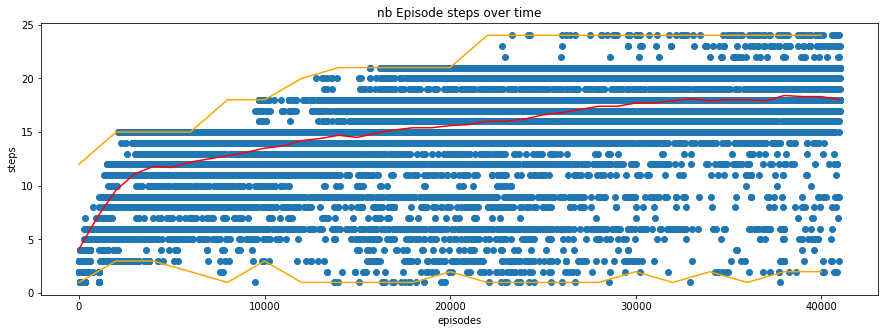

Maximum: 24
Average: 14.999121972634814
Moving Average (simple): {0: 4.1, 1000: 7.1, 2000: 9.6, 3000: 11.1, 4000: 11.8, 5000: 11.7, 6000: 12.2, 7000: 12.5, 8000: 12.8, 9000: 13.1, 10000: 13.5, 11000: 13.7, 12000: 14.2, 13000: 14.4, 14000: 14.7, 15000: 14.5, 16000: 14.9, 17000: 15.2, 18000: 15.4, 19000: 15.4, 20000: 15.6, 21000: 15.7, 22000: 16.0, 23000: 16.0, 24000: 16.2, 25000: 16.6, 26000: 16.8, 27000: 17.1, 28000: 17.4, 29000: 17.4, 30000: 17.7, 31000: 17.7, 32000: 17.9, 33000: 18.1, 34000: 17.9, 35000: 18.0, 36000: 18.0, 37000: 17.9, 38000: 18.4, 39000: 18.3, 40000: 18.3, 41000: 18}

Moving Average: ['+73% (7.1 | 73%)', '+35% (9.6 | 134%)', '+15% (11.1 | 170%)', '+6% (11.8 | 187%)', '0% (11.7 | 185%)', '+4% (12.2 | 197%)', '+2% (12.5 | 204%)', '+2% (12.8 | 212%)', '+2% (13.1 | 219%)', '+3% (13.5 | 229%)', '+1% (13.7 | 234%)', '+3% (14.2 | 246%)', '+1% (14.4 | 251%)', '+2% (14.7 | 258%)', '-1% (14.5 | 253%)', '+2% (14.9 | 263%)', '+2% (15.2 | 270%)', '+1% (15.4 | 275%)', '0% (15.4 |

In [40]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

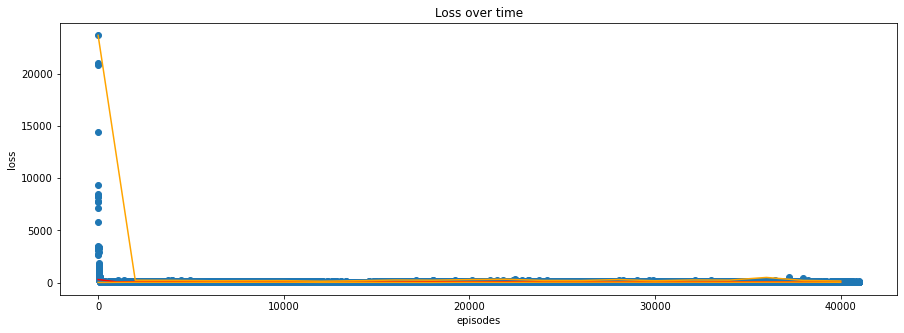

Maximum: 23677.7890625
Average: 78.48168091088903
Moving Average (simple): {0: 284.3, 1000: 59.1, 2000: 80.6, 3000: 105.5, 4000: 100.1, 5000: 88.5, 6000: 78.4, 7000: 76.6, 8000: 75.8, 9000: 70.9, 10000: 72.6, 11000: 64.2, 12000: 59.4, 13000: 54.8, 14000: 53.3, 15000: 57.6, 16000: 64.6, 17000: 67.5, 18000: 70.8, 19000: 73.8, 20000: 77.1, 21000: 81.9, 22000: 83.2, 23000: 84.8, 24000: 84.0, 25000: 82.7, 26000: 81.0, 27000: 80.4, 28000: 80.1, 29000: 79.7, 30000: 76.3, 31000: 74.8, 32000: 73.7, 33000: 68.7, 34000: 66.8, 35000: 69.5, 36000: 68.8, 37000: 65.8, 38000: 61.1, 39000: 60.3, 40000: 58.4}

Moving Average: ['-79% (59.1 | -79%)', '+36% (80.6 | -71%)', '+30% (105.5 | -62%)', '-5% (100.1 | -64%)', '-11% (88.5 | -68%)', '-11% (78.4 | -72%)', '-2% (76.6 | -73%)', '-1% (75.8 | -73%)', '-6% (70.9 | -75%)', '+2% (72.6 | -74%)', '-11% (64.2 | -77%)', '-7% (59.4 | -79%)', '-7% (54.8 | -80%)', '-2% (53.3 | -81%)', '+8% (57.6 | -79%)', '+12% (64.6 | -77%)', '+4% (67.5 | -76%)', '+4% (70.8 | -75%

In [41]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

In [8]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [9]:
#plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")

In [60]:
def pivotIndex(nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        
        total = sum(nums)

        left = 0
        for i, v in enumerate(nums):
            left += v
            
            if total > 0:
                if left > total / 2:
                    temp = left - v

                    if temp == sum(nums[i+1:]):
                        return i

                    else:
                        return -1
            else:
                if left < total / 2:
                    temp = left + v

                    if temp == sum(nums[i-1:]):
                        return i

                    else:
                        return -1

In [61]:
l = [-1,-1,-1,-1,-1,0]


In [62]:
pivotIndex(l)

2